# Restaurant Sales Data Analysis

This notebook analyzes sales data from a restaurant chain across multiple cities, including:
- Sales trends and patterns
- Product performance
- Manager performance
- Payment method preferences
- Monthly revenue analysis

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Loading and Cleaning

In [49]:
# Load data and handle header row
df = pd.read_excel("Sales_Dataset.xlsx")
df.columns = df.iloc[0]  # Set first row as column names
df = df.drop(0).reset_index(drop=True)

## Exploratory Data Analysis


=== Payment Method Preferences ===


,Percentage
Payment Method,
Credit Card,47.24
Cash,29.92
Gift Card,22.83


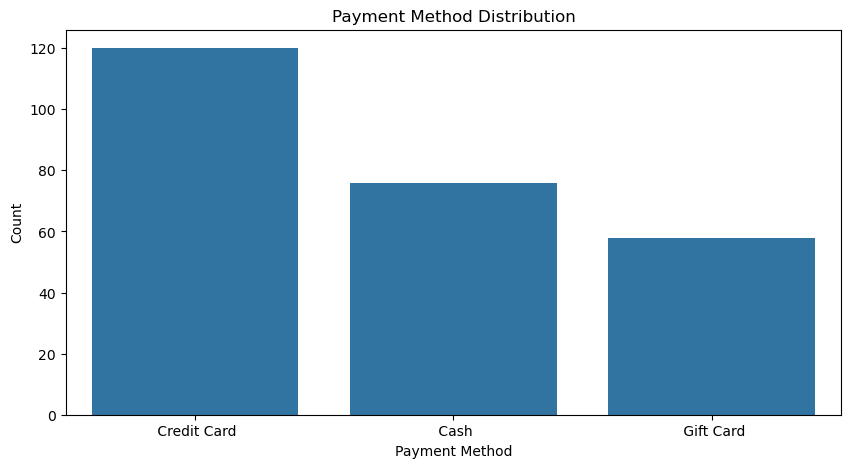

In [50]:
# 1. Payment Method Analysis
print("\n=== Payment Method Preferences ===")
payment_dist = df['Payment Method'].value_counts(normalize=True) * 100
display(payment_dist.to_frame('Percentage'))
    
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Payment Method', order=payment_dist.index)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


=== Product Performance ===

Top Selling Products by Quantity:


Product
Beverages            34,983.05
Fries                32,034.38
Burgers              29,022.32
Chicken Sandwiches   11,135.68
Sides & Other         9,819.64
Name: Quantity, dtype: object

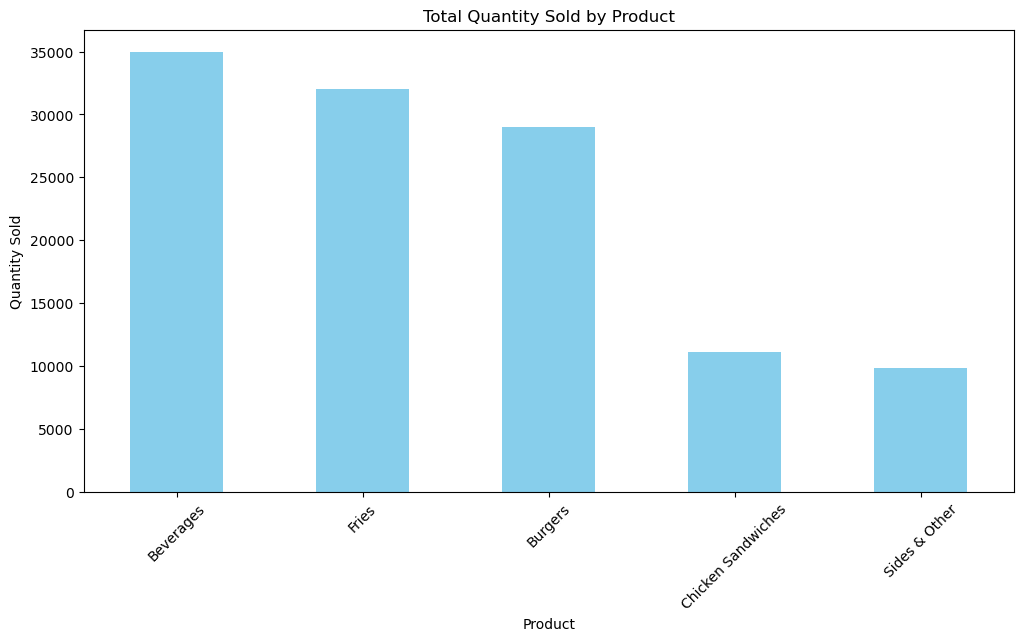

In [51]:
# 2. Product Performance Analysis
print("\n=== Product Performance ===")
    
# By Quantity
product_quantity = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print("\nTop Selling Products by Quantity:")
display(product_quantity.head())
    
plt.figure(figsize=(12, 6))
product_quantity.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold by Product')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


Top Selling Products by Revenue:


Product
Burgers              377,000.00
Fries                125,674.50
Chicken Sandwiches   114,639.20
Beverages                103200
Sides & Other         49,000.00
Name: Revenue, dtype: object

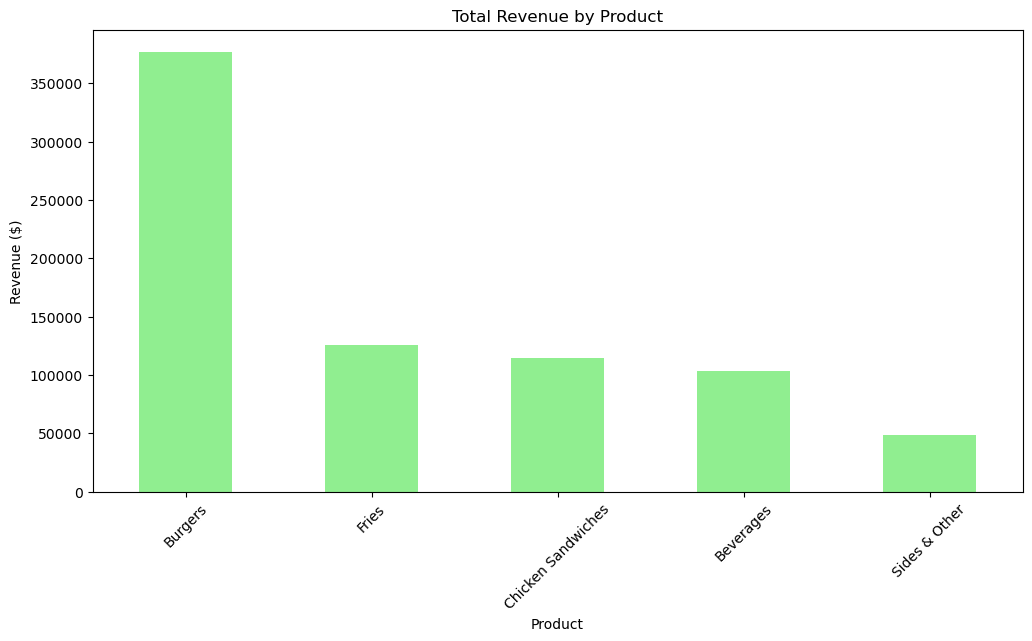

In [52]:
# By Revenue
product_revenue = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
print("\nTop Selling Products by Revenue:")
display(product_revenue.head())
    
plt.figure(figsize=(12, 6))
product_revenue.plot(kind='bar', color='lightgreen')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()

In [53]:
# 3. Geographic and Manager Performance
print("\n=== Performance by City and Manager ===")
    
city_revenue = df.groupby('City')['Revenue'].sum().sort_values(ascending=False)
print("\nTop Performing Cities by Revenue:")
display(city_revenue.head())
    
manager_revenue = df.groupby('Manager')['Revenue'].sum().sort_values(ascending=False)
print("\nTop Performing Managers by Revenue:")
display(manager_revenue.head())


=== Performance by City and Manager ===

Top Performing Cities by Revenue:


City
Lisbon   241,713.69
London   211,200.00
Madrid   136,200.00
Berlin   100,600.00
Paris     79,800.00
Name: Revenue, dtype: object


Top Performing Managers by Revenue:


Manager
Joao Silva      225,074.50
Tom Jackson     209,200.00
Pablo Perez     107,600.00
Walter Muller   100,600.00
Remy Monet       72,800.00
Name: Revenue, dtype: object


=== Revenue Trends Over Time ===


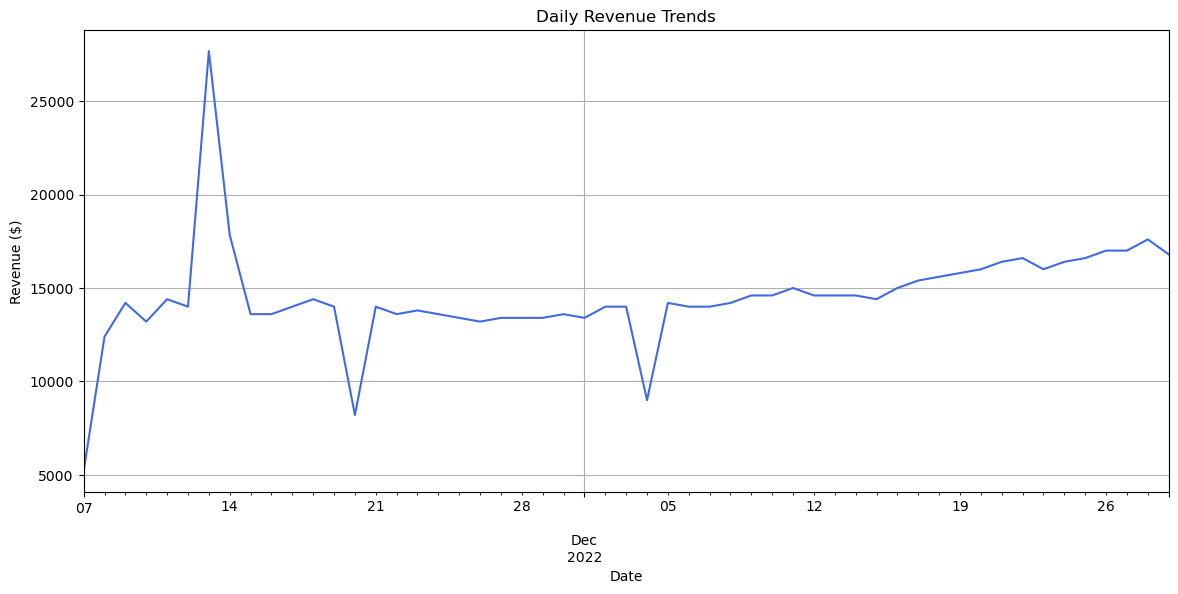

In [54]:
# 4. Time Series Analysis
print("\n=== Revenue Trends Over Time ===")
    
# Daily Revenue
daily_revenue = df.groupby('Date')['Revenue'].sum()
    
plt.figure(figsize=(14, 6))
daily_revenue.plot(color='royalblue')
plt.title('Daily Revenue Trends')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

In [55]:
# Monthly Revenue Comparison
monthly_revenue = df.groupby('Month')['Revenue'].sum()
print("\nMonthly Revenue Comparison:")
display(monthly_revenue)


Monthly Revenue Comparison:


Month
11   332,113.69
12   437,400.00
Name: Revenue, dtype: object

In [56]:
# 5. Statistical Analysis
print("\n=== Key Statistics ===")
stats = df[['Quantity', 'Revenue']].agg(['mean', 'std', 'var']).transpose()
display(stats)


=== Key Statistics ===


,mean,std,var
0,,,
Quantity,460.61,214.89,"46,177.52"
Revenue,"3,029.58","2,420.12","5,857,001.11"


In [57]:
# 6. Product-wise Metrics
print("\n=== Product Performance Metrics ===")
product_metrics = df.groupby('Product').agg({
    'Quantity': 'mean',
    'Revenue': 'mean'
}).sort_values('Revenue', ascending=False)
display(product_metrics)


=== Product Performance Metrics ===


,Quantity,Revenue
Product,,
Burgers,558.12,"7,250.00"
Fries,628.13,"2,464.21"
Chicken Sandwiches,214.15,"2,204.60"
Beverages,699.66,"2,064.00"
Sides & Other,200.40,"1,000.00"


## Advanced Analysis

In [58]:
 # Revenue growth rate
monthly_revenue = df.groupby('Month')['Revenue'].sum()
growth_rate = (monthly_revenue[12] - monthly_revenue[11]) / monthly_revenue[11] * 100
print(f"\nMonth-over-Month Revenue Growth: {growth_rate:.2f}%")


Month-over-Month Revenue Growth: 31.70%


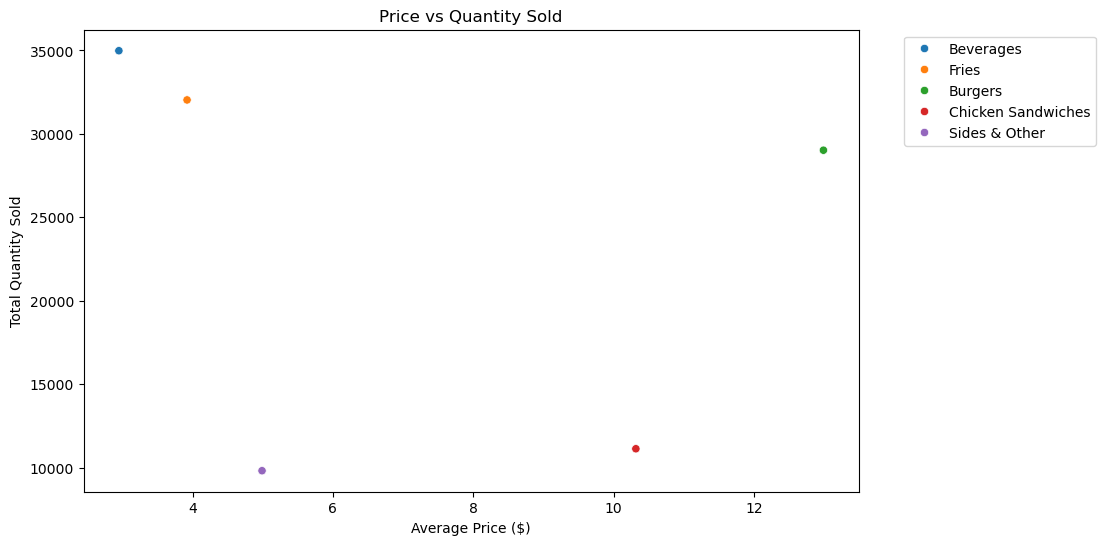

In [59]:
# Price elasticity analysis
product_price_quantity = df.groupby('Product').agg({
    'Price': 'mean',
    'Quantity': 'sum'
}).sort_values('Quantity', ascending=False)
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_price_quantity, x='Price', y='Quantity', hue=product_price_quantity.index)
plt.title('Price vs Quantity Sold')
plt.xlabel('Average Price ($)')
plt.ylabel('Total Quantity Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [60]:
 # Payment method by city
payment_by_city = pd.crosstab(df['City'], df['Payment Method'], normalize='index') * 100
print("\nPayment Method Distribution by City:")
display(payment_by_city.style.background_gradient(cmap='Blues'))


Payment Method Distribution by City:


Payment Method,Cash,Credit Card,Gift Card
City,,,
Berlin,53.333333,10.000000,36.666667
Lisbon,54.666667,12.000000,33.333333
London,8.000000,64.000000,28.000000
Madrid,2.173913,95.652174,2.173913
Paris,42.857143,57.142857,0.000000
